# Modeling for Total Expenditures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# from sklearn.model_selection import cross_val_score
# 

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
county_df = pd.read_csv('../data/county_df.csv', index_col='county')
county_df.head()

,state,total_exp,medical_care_exp,edu_training_exp,exp_per_vet,county_pop,vet_pop,med_patients,state_va_fac,hs_grad_pct,clg_grad_pct,median_income,poverty_pct,unemployment_pct,severe_housing_problems_pct,smokers_pct,obesity_pct,inactive_pct,excess_alcohol_pct,diabetes_pct,food_insecure_pct,age_under18_pct,age_over65_pct,rural_pct
county,,,,,,,,,,,,,,,,,,,,,,,,
autauga,al,75198.383682,20057.504682,4577.286,13.185321,55869,5703.189465,1835.0,24,88.713682,28.317486,67565.0,11.2,2.8,13.630967,19.810766,33.0,30.6,14.473886,12.7,15.6,23.206071,15.973080,42.002162
baldwin,al,177521.631934,50860.502934,7375.405,9.026920,223234,19665.803702,5658.0,24,90.471385,31.907330,71135.0,8.9,3.0,12.996651,18.513318,30.0,24.7,18.736958,10.3,12.9,21.302311,20.977987,42.279099
barbour,al,19914.886299,5575.517299,605.641,10.771528,24686,1848.845078,567.0,24,74.731697,11.614317,38866.0,25.5,5.7,13.710555,25.530768,41.2,28.0,12.466974,17.5,21.9,20.586567,19.691323,67.789635
bibb,al,13536.198918,5398.731918,265.849,10.701738,22394,1264.859814,404.0,24,80.884468,11.346719,50907.0,17.8,3.5,9.255242,23.084813,37.4,33.4,15.420603,13.6,15.1,20.349201,16.669644,68.352607
blount,al,31367.767836,14793.631836,885.531,8.469309,57826,3703.698806,1088.0,24,82.825136,13.251620,55203.0,13.1,2.4,10.125665,22.954959,33.0,33.3,15.833284,14.6,13.6,22.922215,18.700930,89.951502


In [3]:
# dropping med_patients column, it has NaN values and won't be used for this model
county_df.drop(columns='med_patients', inplace=True)
# Encoding state column
county_df = pd.get_dummies(county_df, columns=['state'])

In [139]:
county_df.dtypes.head()

total_exp           float64
medical_care_exp    float64
edu_training_exp    float64
exp_per_vet         float64
county_pop            int64
dtype: object

In [5]:
county_df.head()

,total_exp,medical_care_exp,edu_training_exp,exp_per_vet,county_pop,vet_pop,state_va_fac,hs_grad_pct,clg_grad_pct,median_income,poverty_pct,unemployment_pct,severe_housing_problems_pct,smokers_pct,obesity_pct,inactive_pct,excess_alcohol_pct,diabetes_pct,food_insecure_pct,age_under18_pct,age_over65_pct,rural_pct,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
county,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
autauga,75198.383682,20057.504682,4577.286,13.185321,55869,5703.189465,24,88.713682,28.317486,67565.0,11.2,2.8,13.630967,19.810766,33.0,30.6,14.473886,12.7,15.6,23.206071,15.973080,42.002162,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
baldwin,177521.631934,50860.502934,7375.405,9.026920,223234,19665.803702,24,90.471385,31.907330,71135.0,8.9,3.0,12.996651,18.513318,30.0,24.7,18.736958,10.3,12.9,21.302311,20.977987,42.279099,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
barbour,19914.886299,5575.517299,605.641,10.771528,24686,1848.845078,24,74.731697,11.614317,38866.0,25.5,5.7,13.710555,25.530768,41.2,28.0,12.466974,17.5,21.9,20.586567,19.691323,67.789635,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
bibb,13536.198918,5398.731918,265.849,10.701738,22394,1264.859814,24,80.884468,11.346719,50907.0,17.8,3.5,9.255242,23.084813,37.4,33.4,15.420603,13.6,15.1,20.349201,16.669644,68.352607,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
blount,31367.767836,14793.631836,885.531,8.469309,57826,3703.698806,24,82.825136,13.251620,55203.0,13.1,2.4,10.125665,22.954959,33.0,33.3,15.833284,14.6,13.6,22.922215,18.700930,89.951502,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
county_df.columns

Index(['total_exp', 'medical_care_exp', 'edu_training_exp', 'exp_per_vet',
       'county_pop', 'vet_pop', 'state_va_fac', 'hs_grad_pct', 'clg_grad_pct',
       'median_income', 'poverty_pct', 'unemployment_pct',
       'severe_housing_problems_pct', 'smokers_pct', 'obesity_pct',
       'inactive_pct', 'excess_alcohol_pct', 'diabetes_pct',
       'food_insecure_pct', 'age_under18_pct', 'age_over65_pct', 'rural_pct',
       'state_ak', 'state_al', 'state_ar', 'state_az', 'state_ca', 'state_co',
       'state_ct', 'state_dc', 'state_de', 'state_fl', 'state_ga', 'state_hi',
       'state_ia', 'state_id', 'state_il', 'state_in', 'state_ks', 'state_ky',
       'state_la', 'state_ma', 'state_md', 'state_me', 'state_mi', 'state_mn',
       'state_mo', 'state_ms', 'state_mt', 'state_nc', 'state_nd', 'state_ne',
       'state_nh', 'state_nj', 'state_nm', 'state_nv', 'state_ny', 'state_oh',
       'state_ok', 'state_or', 'state_pa', 'state_ri', 'state_sc', 'state_sd',
       'state_tn', 'state_t

In [7]:
# setting features into groups for ease of testing
exp_cols = ['total_exp', 'medical_care_exp', 'edu_training_exp', 'exp_per_vet']
pop_cols = ['county_pop', 'vet_pop', 'state_va_fac']
edu_cols = ['hs_grad_pct', 'clg_grad_pct']
econ_cols = ['median_income', 'poverty_pct', 'unemployment_pct', 'severe_housing_problems_pct']
health_cols = ['smokers_pct', 'obesity_pct', 'inactive_pct', 'excess_alcohol_pct', 'diabetes_pct', 'food_insecure_pct']
community_cols = ['age_under18_pct', 'age_over65_pct', 'rural_pct']
state_cols = ['state_ak', 'state_al', 'state_ar', 'state_az', 'state_ca', 'state_co',
       'state_ct', 'state_dc', 'state_de', 'state_fl', 'state_ga', 'state_hi',
       'state_ia', 'state_id', 'state_il', 'state_in', 'state_ks', 'state_ky',
       'state_la', 'state_ma', 'state_md', 'state_me', 'state_mi', 'state_mn',
       'state_mo', 'state_ms', 'state_mt', 'state_nc', 'state_nd', 'state_ne',
       'state_nh', 'state_nj', 'state_nm', 'state_nv', 'state_ny', 'state_oh',
       'state_ok', 'state_or', 'state_pa', 'state_ri', 'state_sc', 'state_sd',
       'state_tn', 'state_tx', 'state_ut', 'state_va', 'state_vt', 'state_wa',
       'state_wi', 'state_wv', 'state_wy']

non_exp_columns = pop_cols+edu_cols+econ_cols+health_cols+community_cols+state_cols

In [137]:
def metrics_plots(model, X_train, y_train, X_test, y_test):
    
    y_train_preds = model.predict(X_train)
    y_test_preds = model.predict(X_test)
    
    train_r2 = r2_score(y_train, y_train_preds)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_preds))
    train_mae = mean_absolute_error(y_train, y_train_preds)   
    
    test_r2 = r2_score(y_test, y_test_preds)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_preds))
    test_mae = mean_absolute_error(y_test, y_test_preds)
    print(f'Train Scores \nR2 score = {train_r2} \nRoot Mean Squared Error = {train_rmse} \nMean Absolute Error = {train_mae}')
    print(f'Test Scores \nR2 score = {test_r2} \nRoot Mean Squared Error = {test_rmse} \nMean Absolute Error = {test_mae}')
    
    plt.scatter(y_train_preds, y_train, label='Training data') 
    plt.scatter(y_test_preds, y_test, label='Validation data')
    plt.title('Total Expenditure Prediction by County')
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')
    plt.legend(loc='upper left')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()])

In [157]:
# setting X and y
X = county_df[non_exp_columns]
y = county_df['total_exp']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

# scaled X
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train), columns=sc.get_feature_names_out())
X_test_sc = pd.DataFrame(sc.transform(X_test), columns=sc.get_feature_names_out())

In [158]:
X_test_sc.columns

Index(['county_pop', 'vet_pop', 'state_va_fac', 'hs_grad_pct', 'clg_grad_pct',
       'median_income', 'poverty_pct', 'unemployment_pct',
       'severe_housing_problems_pct', 'smokers_pct', 'obesity_pct',
       'inactive_pct', 'excess_alcohol_pct', 'diabetes_pct',
       'food_insecure_pct', 'age_under18_pct', 'age_over65_pct', 'rural_pct',
       'state_ak', 'state_al', 'state_ar', 'state_az', 'state_ca', 'state_co',
       'state_ct', 'state_dc', 'state_de', 'state_fl', 'state_ga', 'state_hi',
       'state_ia', 'state_id', 'state_il', 'state_in', 'state_ks', 'state_ky',
       'state_la', 'state_ma', 'state_md', 'state_me', 'state_mi', 'state_mn',
       'state_mo', 'state_ms', 'state_mt', 'state_nc', 'state_nd', 'state_ne',
       'state_nh', 'state_nj', 'state_nm', 'state_nv', 'state_ny', 'state_oh',
       'state_ok', 'state_or', 'state_pa', 'state_ri', 'state_sc', 'state_sd',
       'state_tn', 'state_tx', 'state_ut', 'state_va', 'state_vt', 'state_wa',
       'state_wi', 'sta

## Testing of total expenditures per county based on all features

#### Baseline Model Score

train r2 score = 0.0 
test r2 score = -3.3596889778220174e-05
Train Scores 
R2 score = 0.0 
Root Mean Squared Error = 216146.13642676608 
Mean Absolute Error = 82791.36106609095
Test Scores 
R2 score = -3.3596889778220174e-05 
Root Mean Squared Error = 187543.02685734522 
Mean Absolute Error = 83066.05418544414


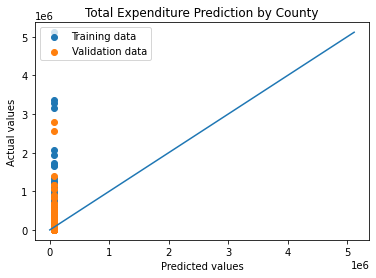

In [159]:
dr = DummyRegressor(strategy='mean')
dr.fit(X_train, y_train)
print(f'train r2 score = {dr.score(X_train_sc, y_train)} \ntest r2 score = {dr.score(X_test_sc, y_test)}')
metrics_plots(dr, X_train_sc, y_train, X_test_sc, y_test)
# preds = dr.predict(X_test)
# reg_metrics(y_test, preds)
# reg_plots(dr, X_train, y_train, X_test, y_test)

#### Testing untuned models with all features

#### Linear Regression

Train Scores 
R2 score = 0.8063797468867456 
Root Mean Squared Error = 95109.2744797055 
Mean Absolute Error = 21448.539086687757
Test Scores 
R2 score = 0.8690153390008754 
Root Mean Squared Error = 67874.06279642573 
Mean Absolute Error = 25396.92354081704


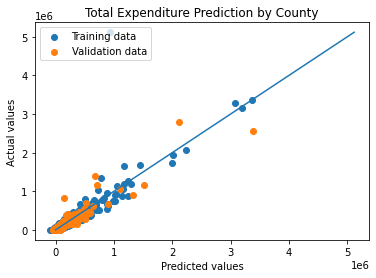

In [160]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
lr.score(X_train_sc, y_train), lr.score(X_test_sc, y_test)
metrics_plots(lr, X_train_sc, y_train, X_test_sc, y_test)
# print(f'train score = {lr.score(X_train_sc, y_train)} \ntest score = {lr.score(X_test_sc, y_test)}')
# reg_plots(lr, X_train_sc, y_train, X_test_sc, y_test)

#### Lasso Regression

Train Scores 
R2 score = 0.8063790618513709 
Root Mean Squared Error = 95109.44272956265 
Mean Absolute Error = 21446.430895725585
Test Scores 
R2 score = 0.8690048686168119 
Root Mean Squared Error = 67876.77553125516 
Mean Absolute Error = 25397.066977493552


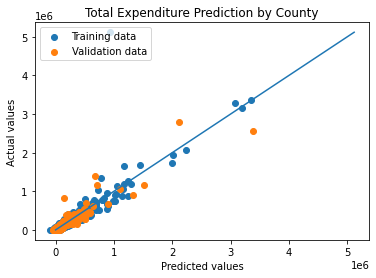

In [161]:
lasso = Lasso(max_iter = 100000)
lasso.fit(X_train_sc, y_train)
metrics_plots(lasso, X_train_sc, y_train, X_test_sc, y_test)
# print(f'train score = {lasso.score(X_train_sc, y_train)} \ntest score = {lasso.score(X_test_sc, y_test)}')
# reg_plots(lasso, X_train_sc, y_train, X_test_sc, y_test)

#### Ridge Regression

Train Scores 
R2 score = 0.806377392115078 
Root Mean Squared Error = 95109.85282814877 
Mean Absolute Error = 21402.185492612407
Test Scores 
R2 score = 0.869174659735318 
Root Mean Squared Error = 67832.77156534846 
Mean Absolute Error = 25347.881635156053


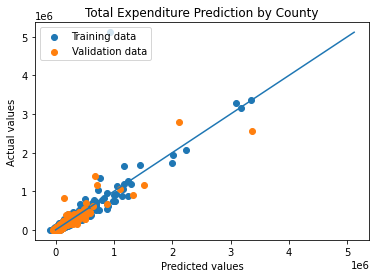

In [162]:
ridge = Ridge()
ridge.fit(X_train_sc, y_train)
metrics_plots(ridge, X_train_sc, y_train, X_test_sc, y_test)
# print(f'train score = {ridge.score(X_train_sc, y_train)} \ntest score = {ridge.score(X_test_sc, y_test)}')
# reg_plots(ridge, X_train_sc, y_train, X_test_sc, y_test)

#### ElasticNet

Train Scores 
R2 score = 0.806377392115078 
Root Mean Squared Error = 95109.85282814877 
Mean Absolute Error = 21402.185492612407
Test Scores 
R2 score = 0.869174659735318 
Root Mean Squared Error = 67832.77156534846 
Mean Absolute Error = 25347.881635156053


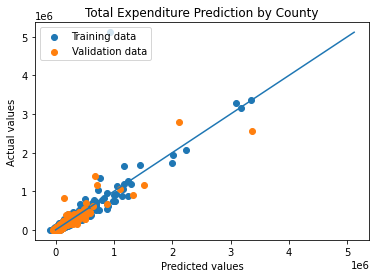

In [163]:
en = ElasticNet()
en.fit(X_train_sc, y_train)
metrics_plots(ridge, X_train_sc, y_train, X_test_sc, y_test)
# print(f'train score = {ridge.score(X_train_sc, y_train)} \ntest score = {ridge.score(X_test_sc, y_test)}')
# reg_plots(ridge, X_train_sc, y_train, X_test_sc, y_test)

#### The Lasso, Ridge, and Elasticnet models are performing nearly identically to the Linear Regression Model, showing robust R2 scores of > .8 for both training and test sets.   We are also seeing similar Root Mean Squared Error and Mean Absolute Error values for all of these models.  Surprisingly, the models are showing slightly better scores on the training set than on the test set.  This is probably the result of the random train test split, and the relatively small sample size of just over 3,000 counties. 

#### Decision Tree Regressor

Train Scores 
R2 score = 1.0 
Root Mean Squared Error = 0.0 
Mean Absolute Error = 0.0
Test Scores 
R2 score = 0.8037324780608253 
Root Mean Squared Error = 83084.08574367453 
Mean Absolute Error = 22182.365909460852


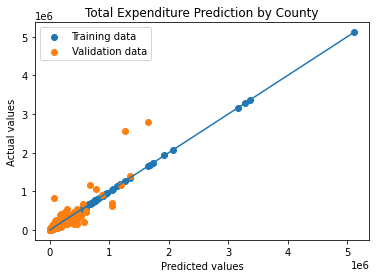

In [164]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
metrics_plots(dt, X_train, y_train, X_test, y_test)
# print(f'train score = {dt.score(X_train, y_train)} \ntest score = {dt.score(X_test, y_test)}')
# reg_plots(dt, X_train, y_train, X_test, y_test)

#### Random Forest Regressor

Train Scores 
R2 score = 0.9517266722496587 
Root Mean Squared Error = 47489.882615356684 
Mean Absolute Error = 7753.67513684618
Test Scores 
R2 score = 0.8364573903580782 
Root Mean Squared Error = 75841.87956330687 
Mean Absolute Error = 18600.738644023888


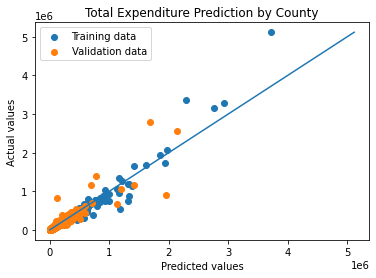

In [165]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
metrics_plots(rf, X_train, y_train, X_test, y_test)
# print(f'train score = {rf.score(X_train, y_train)} \ntest score = {rf.score(X_test, y_test)}')
# reg_plots(rf, X_train, y_train, X_test, y_test)

#### XGBoost Regressor

Train Scores 
R2 score = 0.999904505330801 
Root Mean Squared Error = 2112.2097418114286 
Mean Absolute Error = 1440.5451530699156
Test Scores 
R2 score = 0.8265000744463649 
Root Mean Squared Error = 78116.58913227661 
Mean Absolute Error = 18546.35913994379


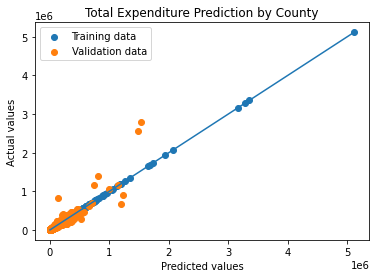

In [166]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
metrics_plots(xgb, X_train, y_train, X_test, y_test)
# print(f'train score = {xgb.score(X_train, y_train)} \ntest score = {xgb.score(X_test, y_test)}')
# reg_plots(xgb, X_train, y_train, X_test, y_test)

##### All of the tree type models are all showing extremely high R2 scores on the training set.  The Decision Tree model in particular shows a perfect R2 score of 1.0, and RMSE and MAE scores of 0, indicating that it is fitting each point exactly.  However, all three models are showing a large difference between the train and test scores, indicating that they are heavily overfit to the training data.  Each is showing an R2 score of around .8 on the test set, and have higher error scores than the earlier models. 

##### All of the basic models scored reasonably well, but due to the overfitting of the decision tree models, I am going to continue on with one of the earlier models for further tuning.

## Tuning Lasso Model

In [167]:
lasso = Lasso()
params = {
    'alpha': [ 0, .00001, .0001, .001, .01, .1, .25, .5, .75, .9, 1, 5, 10],
    'max_iter': [10000]
}
gs = GridSearchCV(lasso, param_grid=params, verbose=1, n_jobs=-1)

In [168]:
gs.fit(X_train_sc, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.25,
                                   0.5, 0.75, 0.9, 1, 5, 10],
                         'max_iter': [10000]},
             verbose=1)

In [169]:
gs.score(X_train_sc, y_train), gs.score(X_test_sc, y_test)

(0.8063782012866011, 0.8690524691145309)

In [170]:
gs.best_params_

{'alpha': 10, 'max_iter': 10000}

##### The Lasso gridsearch is returning an alpha of 10 as the best parameter, indicating some scaling down and elimination of features.

Train Scores 
R2 score = 0.8063782012866011 
Root Mean Squared Error = 95109.65409034194 
Mean Absolute Error = 21389.578916787737
Test Scores 
R2 score = 0.8690524691145309 
Root Mean Squared Error = 67864.4420123212 
Mean Absolute Error = 25329.692912666556


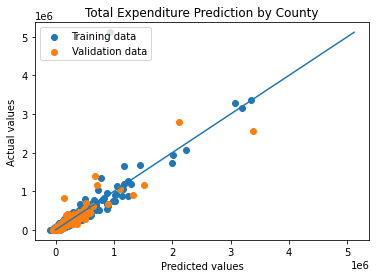

In [171]:
metrics_plots(gs, X_train_sc, y_train, X_test_sc, y_test)

### Coefficients

In [172]:
gs.best_estimator_.coef_

array([-2.64673822e+04,  2.10165371e+05, -8.57623155e+02,  1.60561549e+03,
       -7.46941068e+03, -1.44857940e+04, -3.26971124e+03, -1.56115316e+03,
        2.38913842e+03, -1.93874960e+04,  1.67972149e+03, -4.41046273e+01,
        1.04918947e+04, -1.30477696e+03,  1.72078291e+04,  1.07831770e+03,
       -5.02085341e+03,  6.23423373e+03,  8.30397626e+02, -3.07326686e+02,
        6.38984103e+02, -9.29775818e+02, -1.01478843e+00, -4.96830088e+02,
       -1.46742073e+03,  6.31153007e+04, -1.60111286e+03, -2.11435344e+03,
        3.93187840e+02, -2.53482545e+03, -5.11261734e+02, -3.13873363e+02,
       -3.71786277e+02,  1.74087175e+03,  6.76751093e+00,  2.61819591e+03,
        0.00000000e+00,  3.66502304e+02, -1.23819384e+03, -5.26959194e+02,
       -2.71277124e+03,  1.75821877e+03,  4.74876982e+02, -1.20780543e+03,
        7.88049956e+02,  1.73694685e+03,  2.80626797e+03, -3.72287269e+03,
       -6.43959529e+02, -1.12760443e+03, -8.25908333e+02,  7.95265665e+02,
       -2.99093558e+02,  

In [173]:
coefs = pd.DataFrame()
coefs['features'] = X.columns
coefs['coefs'] = gs.best_estimator_.coef_
coefs.sort_values(by='coefs', ascending=False).head(15)

,features,coefs
1,vet_pop,210165.370774
25,state_dc,63115.300705
14,food_insecure_pct,17207.829101
53,state_oh,10577.831422
12,excess_alcohol_pct,10491.894716
17,rural_pct,6234.233734
67,state_wv,4734.453127
60,state_tn,4361.487495
63,state_va,3855.603198
54,state_ok,3399.716657


##### The highest correlation for VA expenditures per county is the veteran population, which is not really surprising.  Food insecurity, excess alcohol usage, and % of the population living in rural areas also show high correlation with expenditures.

##### Regarding location, Washington DC has the highest correlation with VA spending.  Counties being in the states of Ohio, West Virginia, Tennessee, Virginia, and Oklahoma also show a significant correlation.

#### Health Coefficients

In [174]:
health_coefs = coefs[coefs['features'].isin(health_cols)]
health_coefs.sort_values(by='coefs', ascending=False).head()

,features,coefs
14,food_insecure_pct,17207.829101
12,excess_alcohol_pct,10491.894716
10,obesity_pct,1679.721487
11,inactive_pct,-44.104627
13,diabetes_pct,-1304.776960


##### Subdividing the features into those related to health, food insecurity has the highest correlation to spending, followed by excess alcohol use and obesity rate.  In this model, higher percentages of the population being inactive and having diabetes actually to a negative correlation.  

#### Population Coefficients

In [175]:
pop_coefs = coefs[coefs['features'].isin(pop_cols)]
pop_coefs.sort_values(by='coefs', ascending=False)

,features,coefs
1,vet_pop,210165.370774
2,state_va_fac,-857.623155
0,county_pop,-26467.382199


##### Interestingly, total county population has a negative correlation with spending in this model.  However, it is an order of magnitude lower than veteran population, so this is most likely to a relationship between the two.

#### Education Coefficients

In [176]:
edu_coefs = coefs[coefs['features'].isin(edu_cols)]
edu_coefs.sort_values(by='coefs', ascending=False).head()

,features,coefs
3,hs_grad_pct,1605.615490
4,clg_grad_pct,-7469.410678


#### Economic Coefficients

In [177]:
econ_coefs = coefs[coefs['features'].isin(econ_cols)]
econ_coefs.sort_values(by='coefs', ascending=False).head()

,features,coefs
8,severe_housing_problems_pct,2389.138416
7,unemployment_pct,-1561.153161
6,poverty_pct,-3269.711244
5,median_income,-14485.794050


#### Community Coefficients

In [178]:
community_coefs = coefs[coefs['features'].isin(community_cols)]
community_coefs.sort_values(by='coefs', ascending=False).head()

,features,coefs
17,rural_pct,6234.233734
15,age_under18_pct,1078.317702
16,age_over65_pct,-5020.853406


#### State Coefficients

In [179]:
state_coefs = coefs[coefs['features'].isin(state_cols)]
state_coefs.sort_values(by='coefs', ascending=False).head()

,features,coefs
25,state_dc,63115.300705
53,state_oh,10577.831422
67,state_wv,4734.453127
60,state_tn,4361.487495
63,state_va,3855.603198
